In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

DATA LOAD AND GENERAL OVERVIEW

In [7]:
df1 = pd.read_csv("housing_data.csv")
df1

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


# first5 samples


In [60]:
df1.shape

(1460, 81)

In [61]:
df1.head(5)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [62]:
df1.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [63]:
df1.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [64]:
df1.Condition1.value_counts().index

Index(['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn',
       'RRNe'],
      dtype='object', name='Condition1')

In [65]:
df1.Condition2.value_counts().index

Index(['Norm', 'Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe'], dtype='object', name='Condition2')

In [66]:
df1.SaleType.value_counts().index

Index(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con'], dtype='object', name='SaleType')

In [67]:
df1.SaleType.value_counts().values


array([1267,  122,   43,    9,    5,    5,    4,    3,    2], dtype=int64)

In [68]:
# Strip whitespace from all column names
df1.columns = df1.columns.str.strip()

In [69]:
print(df1.columns.tolist())

['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [71]:
#summary statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1460.0,729.500000,421.610009,0.0,364.75,729.5,1094.25,1459.0
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [72]:
#missing value check
df1.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [73]:
df1.isnull().sum().all()

False

In [74]:
#Removal of Duplicates
df1 = df1.drop_duplicates()
df1

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [75]:
df1['Alley_nan']=np.where(df1['Alley'].isnull(),1,0)
## find the percentage of nan values
df1['Alley_nan'].mean()

0.9376712328767123

In [76]:
df1.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_nan
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,No,No,No,0,Feb,2008,WD,Normal,208500,1
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,No,No,No,0,May,2007,WD,Normal,181500,1
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,No,No,No,0,Sep,2008,WD,Normal,223500,1
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,No,No,No,0,Feb,2006,WD,Abnorml,140000,1
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,No,No,No,0,Dec,2008,WD,Normal,250000,1


In [77]:
df1["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [78]:
df1["Alley"].value_counts()



Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [79]:
df1.shape

(1460, 81)

In [80]:
df1.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
df1['MasVnrType']=df1['MasVnrType'].fillna(df1'['MasVnrType'].mode()[0])
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1'['MasVnrArea'].mode()[0])


In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna(df1'['BsmtFinType2'].mode()[0])

In [ ]:
df1.dropna(inplace=True)

In [78]:
df1.shape

(1460, 81)

In [77]:
df1.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [ ]:
X['MSZoning'].unique()

In [ ]:
X['PoolQC'].unique()


In [ ]:
X['Fence'].unique()


In [ ]:
X

In [37]:
import pandas as pd

# --- Load your data ---------------------------------------------------------
df = pd.read_csv("housing_data.csv")

# --- 1. Identify column types ----------------------------------------------
num_cols = df1.select_dtypes(include=["number"]).columns      # all numeric
cat_cols = df1.select_dtypes(exclude=["number"]).columns      # everything else

# --- 2. Fill missing values -------------------------------------------------
# Numerical → mean
df1[num_cols] = df1[num_cols].fillna(df1[num_cols].mean())

# Categorical → mode (most frequent value)
df1[cat_cols] = df1[cat_cols].apply(lambda s: s.fillna(s.mode()[0]))

# --- 3. Quick check ---------------------------------------------------------
print("Any NA left?  ➜", df1.isna().sum().sum() == 0)


Any NA left?  ➜ True


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numeric_transformer = SimpleImputer(strategy="mean")
categorical_transformer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="passthrough"   # leave other columns as‑is
)

# Fit‑transform the data
df1_clean = pd.DataFrame(
    preprocessor.fit_transform(df1),
    columns=num_cols.tolist() + cat_cols.tolist()
)


Univariate Analysis for Numerical Variables


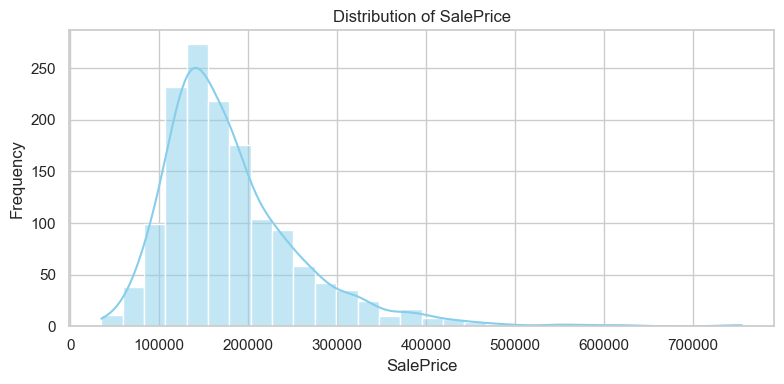

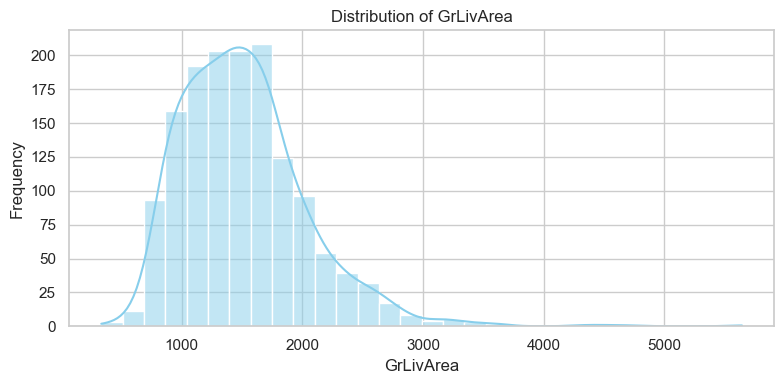

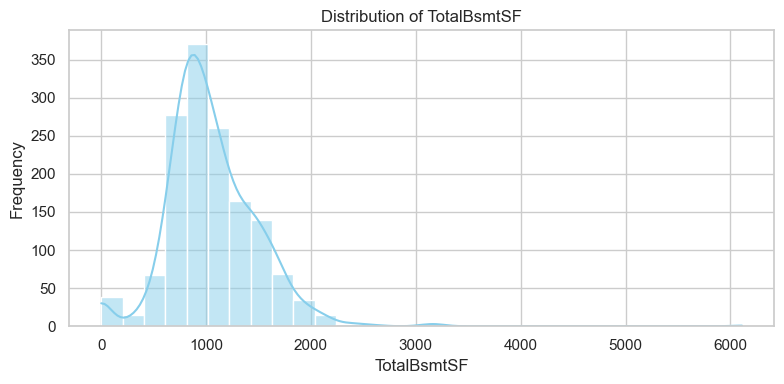

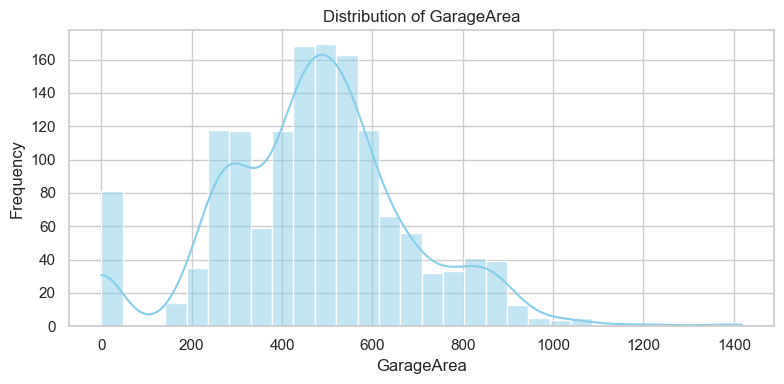

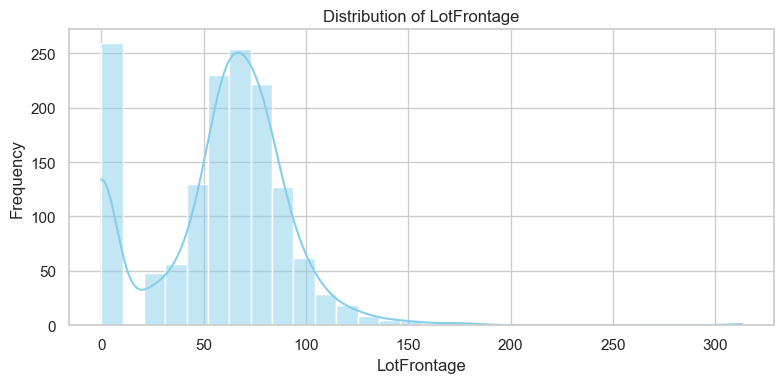

In [41]:
# List of numerical columns to analyze
numerical_cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotFrontage']

# Plot histogram + KDE (distribution) for each numeric variable
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='#12E193')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Univariate Analysis for Categorical Variables

Compute and Visualize Correlation Matrix

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your housing dataset
df = pd.read_csv("housing_data.csv")


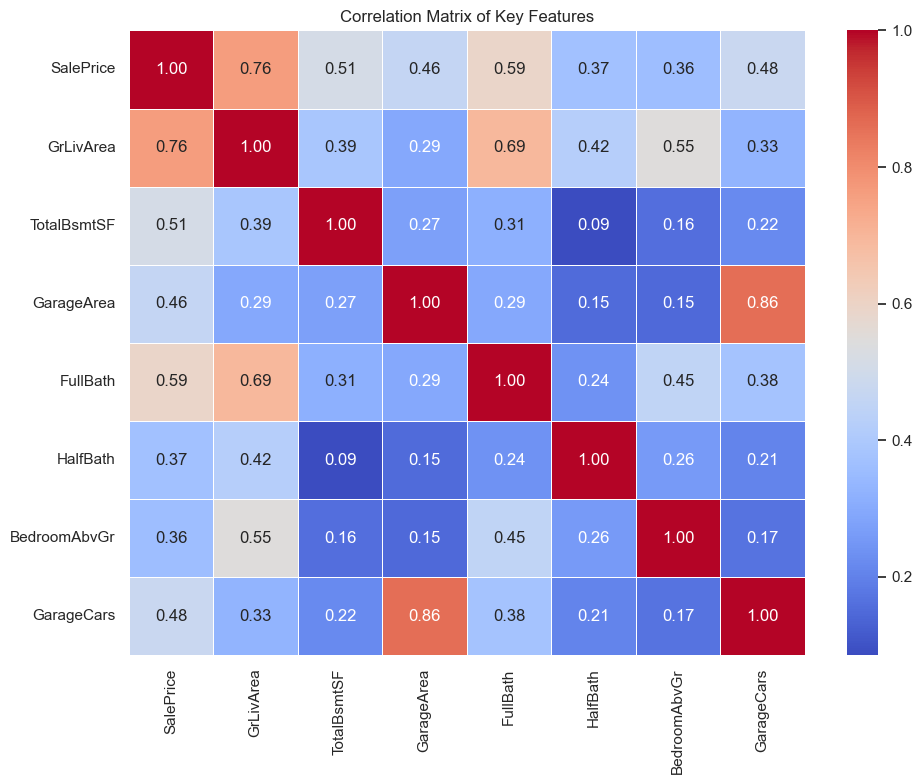

In [44]:
# Select numerical features for analysis
selected_features = [
    'SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'GarageCars'
]

# Compute correlation matrix
corr_matrix = df1[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Features")
plt.tight_layout()
plt.show()


Categorical Data



In [ ]:


sns.countplot(df1["MSSubClass"])
df1["MSSubClass"].value_counts().plot(kind='bar')


Numerical Data

DISPLOT

BOX PLOT

In [ ]:
sns.boxplot(df1["SalePrice"])

In [48]:
df1["SalePrice"].min()

34900

In [49]:
df1["SalePrice"].max()

745000

In [50]:
df1["SalePrice"].mean()

152912.00711743772

In [51]:
df1.head()

,GrLivArea,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,KitchenQual_num,Fireplaces,GarageCars,GarageArea,PoolArea,Fence_num,ExterQual_num,SalePrice
5,1362,796,1,1,1,3,0,2,480,0,3.0,3,143000
14,1253,1253,1,1,2,3,1,1,352,0,2.0,3,157000
15,854,832,1,0,2,3,0,2,576,0,4.0,3,132000
19,1339,1029,1,0,3,3,0,1,294,0,3.0,3,139000
21,1108,637,1,0,3,4,1,1,280,0,4.0,3,139400


In [ ]:
df1['Price_per_sqft'] = df1['SalePrice'] / df1['GrLivArea']

In [ ]:
df1['Property_Age'] = df1['YrSold'] - df1['YearBuilt']

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Price for a proper line plot
df_sorted = df1.sort_values(by='SalePrice')

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['SalePrice'], df_sorted['YrSold'], marker='o', linestyle='-')

plt.title('SalePrice vs Year Sold')
plt.xlabel('SalePrice')
plt.ylabel('Year Sold')
plt.grid(True)
plt.show()


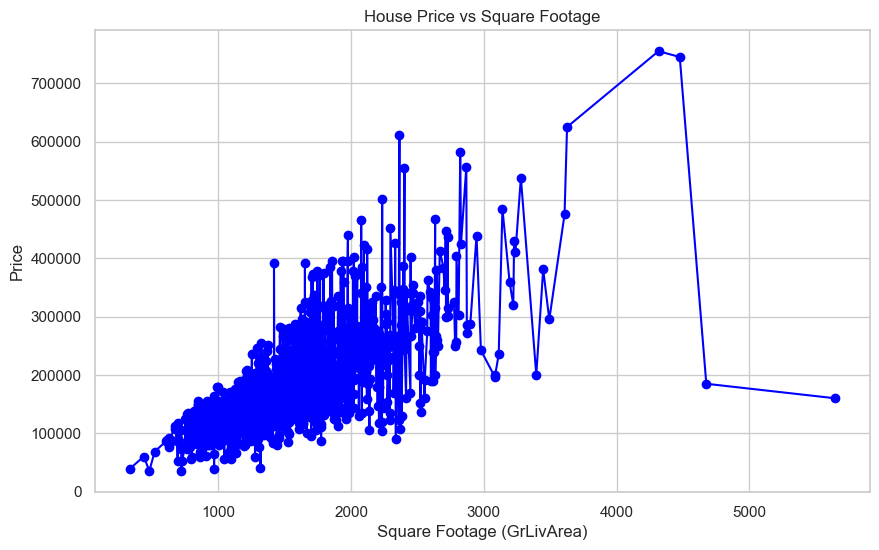

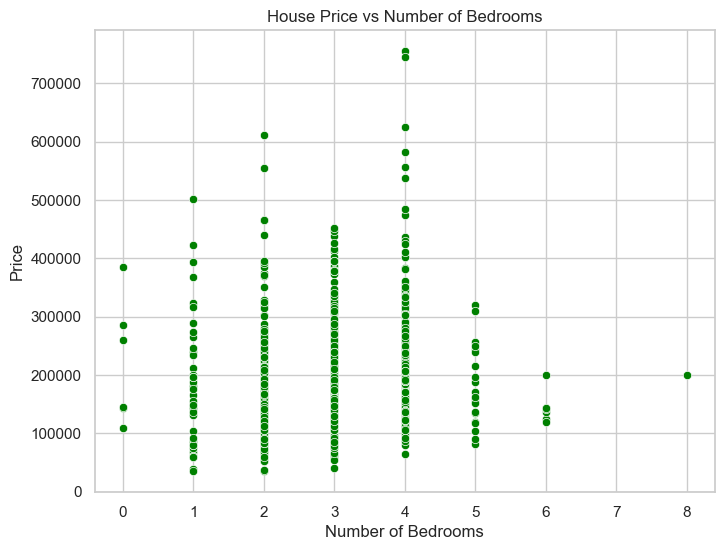

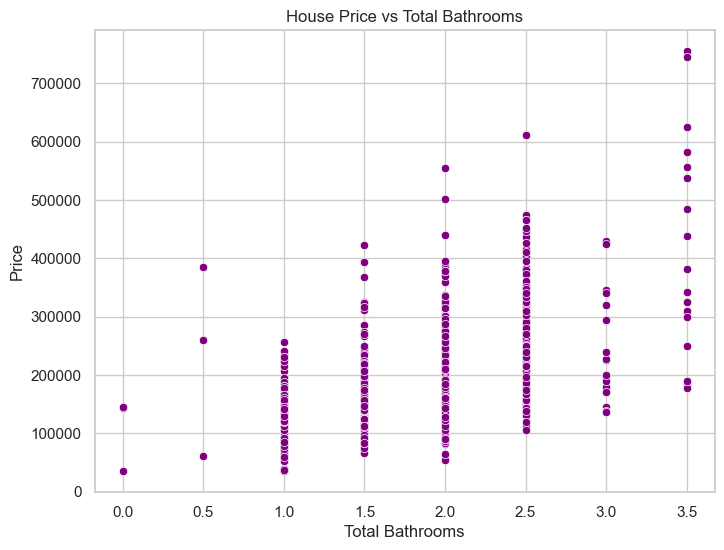

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Line plot: Price vs Square Footage (GrLivArea)
plt.figure(figsize=(10, 6))
df1_sorted = df1.sort_values('GrLivArea')
plt.plot(df1_sorted['GrLivArea'], df1_sorted['SalePrice'], marker='o', linestyle='-', color='blue')
plt.title('House Price vs Square Footage')
plt.xlabel('Square Footage (GrLivArea)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 2. Scatter plot: Price vs Number of Bedrooms
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df1, color='green')
plt.title('House Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# 3. Scatter plot: Price vs Total Bathrooms
# Combine FullBath and HalfBath into a total count
df1['Total_Bathrooms'] = df1['FullBath'] + 0.5 * df1['HalfBath']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Bathrooms', y='SalePrice', data=df1, color='purple')
plt.title('House Price vs Total Bathrooms')
plt.xlabel('Total Bathrooms')
plt.ylabel('Price')
plt.show()


In [ ]:
#Our dataset includes essential columns for analyzing historical pricing trends over time, such as:

SalePrice: House price

YrSold: Year the property was sold

MoSold: Month the property was sold

GrLivArea, FullBath, BedroomAbvGr, etc.: House features

In [ ]:
 #Aggregate Average Prices by Year
#This will show how house prices have changed year to year.

In [8]:
print(df1.columns)


Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [9]:
price_trends = df1.groupby('YrSold')['SalePrice'].mean().reset_index()


In [10]:
df1.rename(columns={'YrSold': 'Year'}, inplace=True)  # Or change 'Date' to actual column name


In [11]:
print(df1.columns)


Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [12]:
merged = pd.merge(price_trends, df1, left_on='YrSold', right_on='Year', how='left')


In [14]:
print(merged)

      YrSold    SalePrice_x  Unnamed: 0 MSSubClass MSZoning  LotFrontage  \
0       2006  182549.458599           3       SC70       RL           60   
1       2006  182549.458599          11       SC60       RL           85   
2       2006  182549.458599          17       SC90       RL           72   
3       2006  182549.458599          20       SC60       RL          101   
4       2006  182549.458599          28       SC20       RL           47   
...      ...            ...         ...        ...      ...          ...   
1455    2010  177393.674286        1438       SC20       RM           90   
1456    2010  177393.674286        1446       SC20       RL            0   
1457    2010  177393.674286        1456       SC20       RL           85   
1458    2010  177393.674286        1457       SC70       RL           66   
1459    2010  177393.674286        1458       SC20       RL           68   

      LotArea Street Alley LotShape  ... PoolArea PoolQC  Fence MiscFeature  \
0       

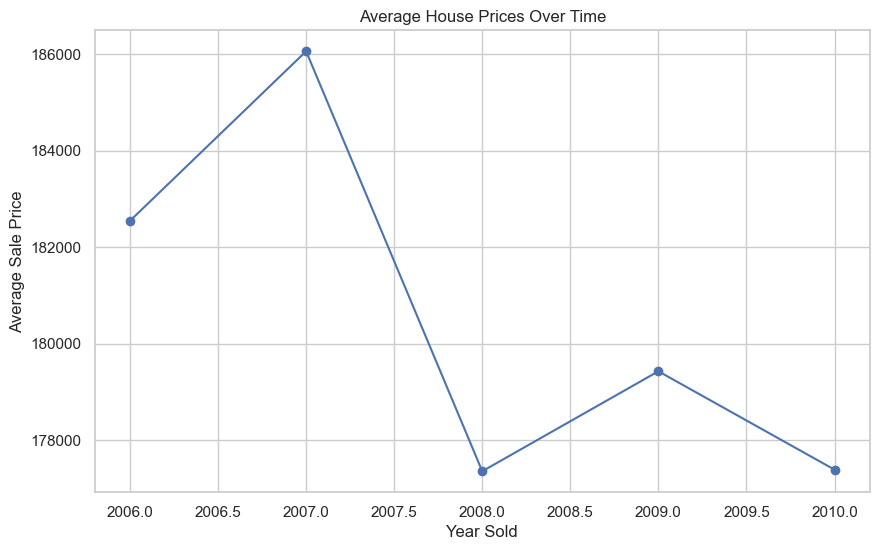

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(price_trends['YrSold'], price_trends['SalePrice'], marker='o', linestyle='-')
plt.title('Average House Prices Over Time')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()


In [ ]:
📈 Summary of Historical Pricing Trends (2006–2010)
Your dataset contains house sale records from 2006 to 2010. Here's a breakdown of the average sale price each year:

Year	Average Sale Price (₹)
2006	₹182,549
2007	₹186,063 (Peak)
2008	₹177,361
2009	₹179,432
2010	₹177,394

📊 Key Insights:
Peak Year: Prices peaked in 2007 with an average sale price of ₹186,063.

Drop After 2007: There was a noticeable drop in 2008, likely due to the global financial crisis.

Stable but Lower: Prices stayed relatively stable from 2008 to 2010, hovering around ₹177,000–₹179,000, but didn’t recover to 2007 levels.

📌 Summary Stats:
Mean price over 5 years: ₹180,560

Lowest average: ₹177,361 (in 2008)

Highest average: ₹186,063 (in 2007)

Standard deviation: ₹3,734 (modest volatility)



In [23]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the housing data
df1 = pd.read_csv("housing_data.csv")

# Create a proper date column from YrSold and MoSold
df1['SaleDate'] = pd.to_datetime(df1['YrSold'].astype(str) + '-' + df1['MoSold'] + '-01', errors='coerce')

# Group by SaleDate to get average monthly sale price
monthly_prices = df1.groupby('SaleDate')['SalePrice'].mean().reset_index()


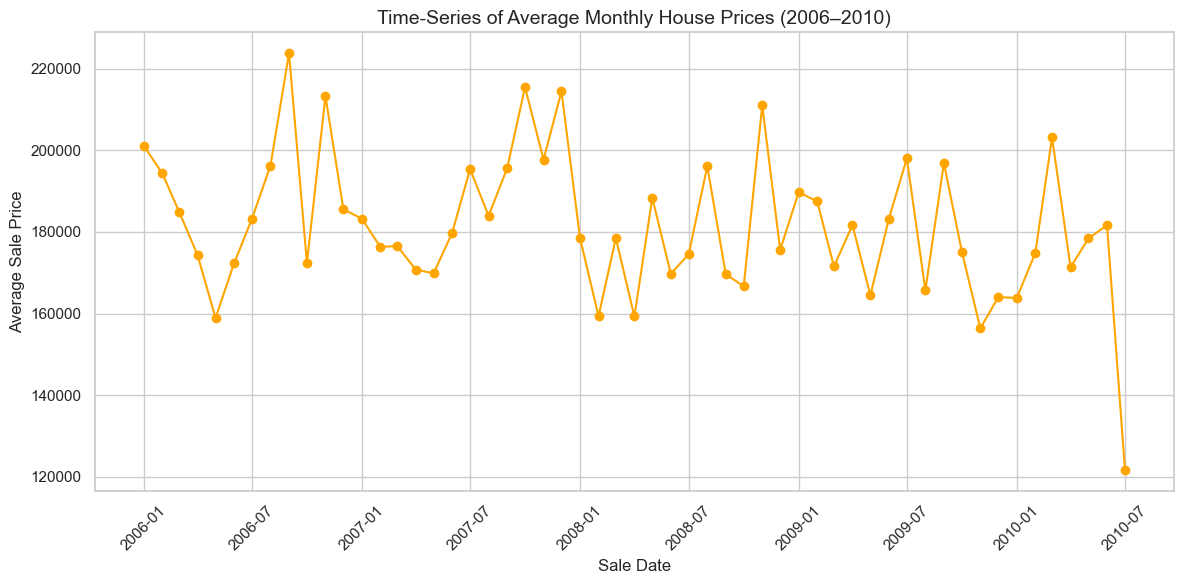

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_prices['SaleDate'], monthly_prices['SalePrice'], color='orange', marker='o', linestyle='-')

plt.title('Time-Series of Average Monthly House Prices (2006–2010)', fontsize=14)
plt.xlabel('Sale Date', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
This Visualization Tells :

# Detects price fluctuations month-by-month.

#Helps identify impact of market trends, such as economic downturns (e.g., the 2008 crash).

#Useful for forecasting models or policy/planning decisions in real estate.

In [ ]:
#Correlation Analysis

In [53]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv("housing_data.csv")

# Feature 1: Age of the property when sold
df1['HouseAge'] = df1['YrSold'] - df1['YearBuilt']

# Feature 2: Years since last renovation (0 if never remodeled)
df1['YearsSinceRemod'] = df1['YrSold'] - df1['YearRemodAdd']

# Feature 3: Age of garage (if garage year built is available)
if 'GarageYrBlt' in df1.columns:
    df1['GarageArea'] = df1['YrSold'] - df1['GarageYrBlt']
    # Replace unreasonable values (like negative or very high) with NaN
    df1['GarageArea'] = df['GarageArea'].apply(lambda x: x if 0 <= x <= 100 else None)

# View the new age-related features
df1[['YearBuilt', 'YearRemodAdd', 'YrSold', 'HouseAge', 'YearsSinceRemod']].head()


,YearBuilt,YearRemodAdd,YrSold,HouseAge,YearsSinceRemod
0,2003,2003,2008,5,5
1,1976,1976,2007,31,31
2,2001,2002,2008,7,6
3,1915,1970,2006,91,36
4,2000,2000,2008,8,8


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv("housing_data.csv")

In [61]:
# Total Bathrooms (including half baths as 0.5)
df1['TotalBathrooms'] = df1['FullBath'] + 0.5 * df1['HalfBath'] + df1['BsmtFullBath'] + 0.5 * df1['BsmtHalfBath']

# Total Square Footage (Above ground + basement)
df1['TotalSqFt'] = df1['GrLivArea'] + df1['TotalBsmtSF']

# Bedroom-to-Bathroom ratio
df1['BathsPerBedroom'] = df1['TotalBathrooms'] / (df1['BedroomAbvGr'] + 1)  # +1 to avoid division by zero

# Price per square foot
df1['PricePerSqFt'] = df1['SalePrice'] / df1['GrLivArea']


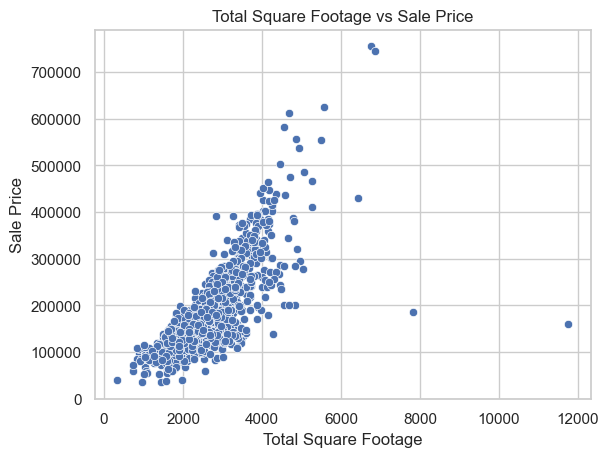

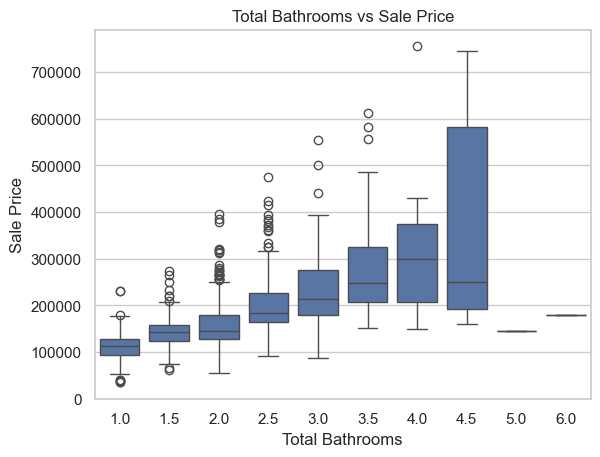

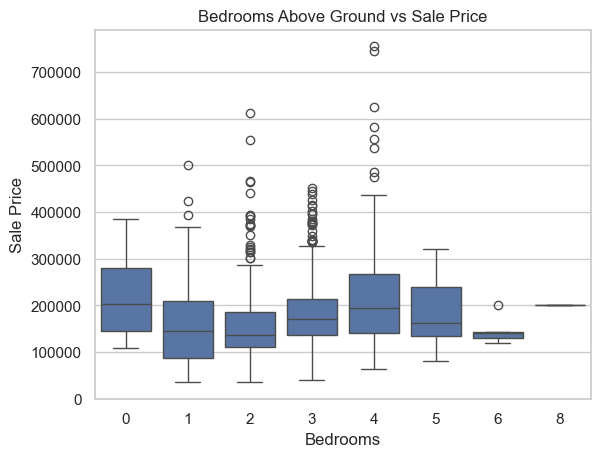

In [62]:
# Total Square Footage vs Price
sns.scatterplot(x='TotalSqFt', y='SalePrice', data=df1)
plt.title("Total Square Footage vs Sale Price")
plt.xlabel("Total Square Footage")
plt.ylabel("Sale Price")
plt.show()

# Total Bathrooms vs Price
sns.boxplot(x='TotalBathrooms', y='SalePrice', data=df1)
plt.title("Total Bathrooms vs Sale Price")
plt.xlabel("Total Bathrooms")
plt.ylabel("Sale Price")
plt.show()

# Bedrooms vs Price
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df1)
plt.title("Bedrooms Above Ground vs Sale Price")
plt.xlabel("Bedrooms")
plt.ylabel("Sale Price")
plt.show()


Aggregate Average Price Over Time

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df1 = pd.read_csv("housing_data.csv")

# Optional: Combine year and month to create a sale date (if both available)
if 'MoSold' in df1.columns and 'YrSold' in df1.columns:
    df1['SaleDate'] = pd.to_datetime(df1['YrSold'].astype(str) + '-' + df1['MoSold'].astype(str) + '-01')
else:
    df['SaleDate'] = pd.to_datetime(df1['YrSold'], format='%Y')


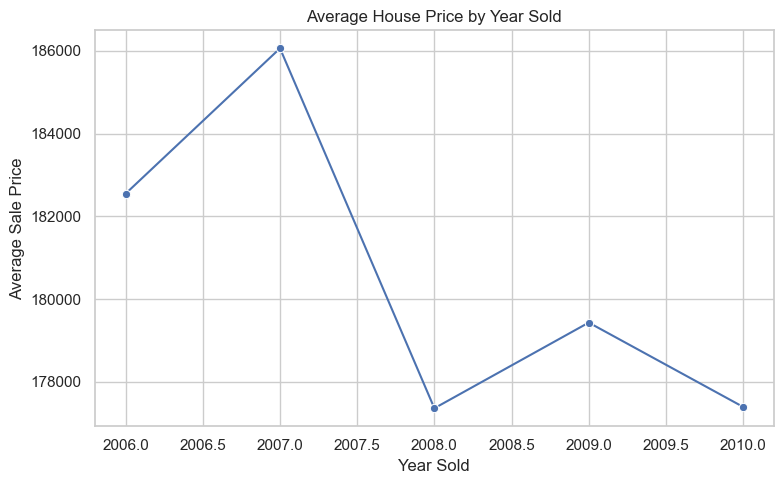

In [65]:
# Group by Sale Year and compute average price
avg_price_by_year = df1.groupby('YrSold')['SalePrice'].mean().reset_index()

# Line plot: average price per year
plt.figure(figsize=(8, 5))
sns.lineplot(x='YrSold', y='SalePrice', data=avg_price_by_year, marker='o')
plt.title("Average House Price by Year Sold")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price")
plt.grid(True)
plt.tight_layout()
plt.show()


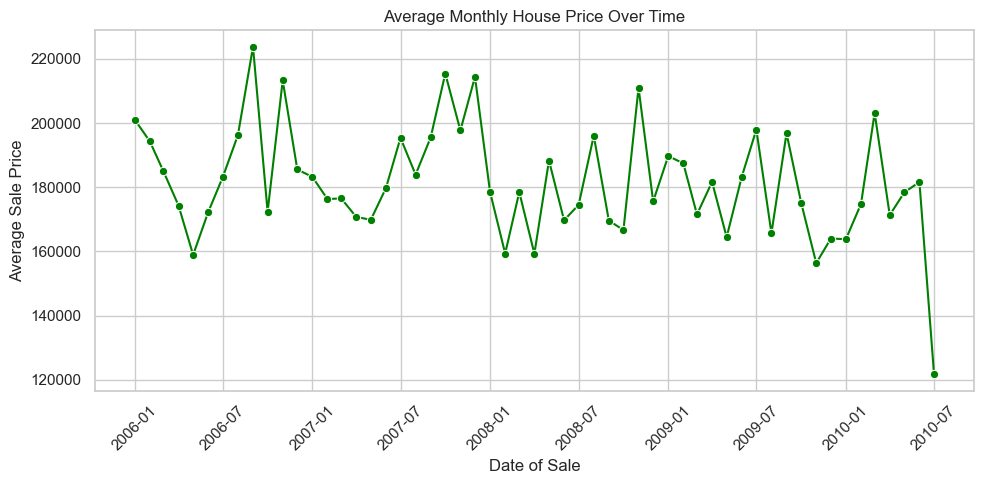

In [69]:
# Monthly Trend (if month is available)
# Monthly trend (if SaleDate is created)
monthly_avg_price = df1.groupby('SaleDate')['SalePrice'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='SaleDate', y='SalePrice', data=monthly_avg_price, marker='o', color='green')
plt.title("Average Monthly House Price Over Time")
plt.xlabel("Date of Sale")
plt.ylabel("Average Sale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



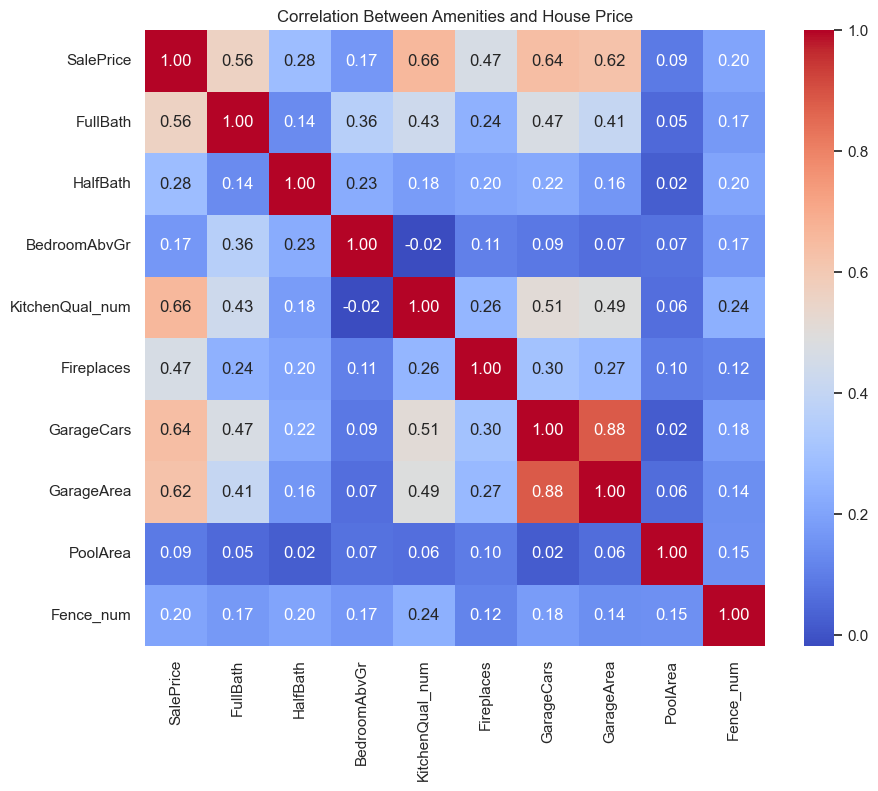

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df1 = pd.read_csv("housing_data.csv")

# Map categorical features to numeric values (for correlation)
df1['KitchenQual_num'] = df1['KitchenQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df1['Fence_num'] = df1['Fence'].map({'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})

# Create a correlation plot
features = ['SalePrice', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual_num', 
            'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea', 'Fence_num']

corr = df1[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Amenities and House Price")
plt.show()


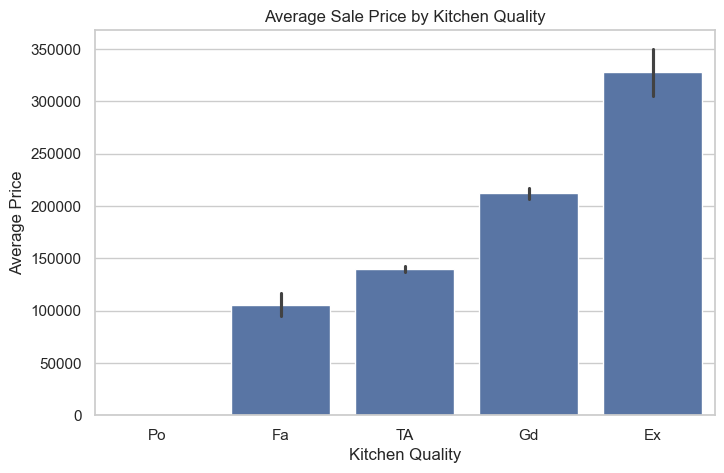

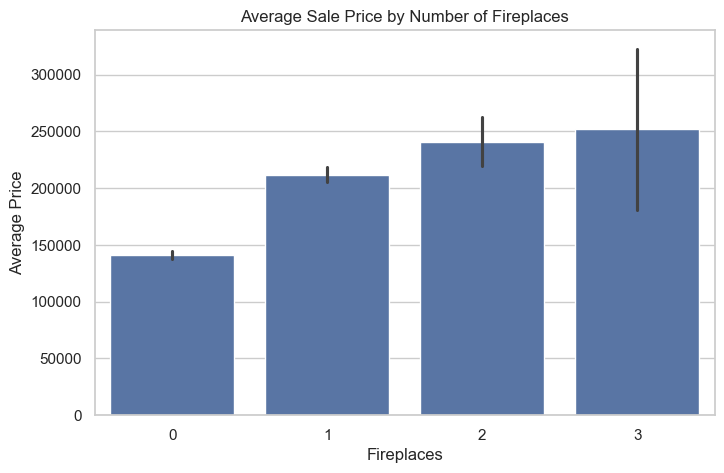

In [27]:
# Average price by kitchen quality
plt.figure(figsize=(8, 5))
sns.barplot(x='KitchenQual', y='SalePrice', data=df1, estimator='mean', order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title('Average Sale Price by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Average Price')
plt.show()

# Average price by number of fireplaces
plt.figure(figsize=(8, 5))
sns.barplot(x='Fireplaces', y='SalePrice', data=df1, estimator='mean')
plt.title('Average Sale Price by Number of Fireplaces')
plt.xlabel('Fireplaces')
plt.ylabel('Average Price')
plt.show()


R² Score: 0.6436535946741313
Mean Absolute Error: 27623.696407691168


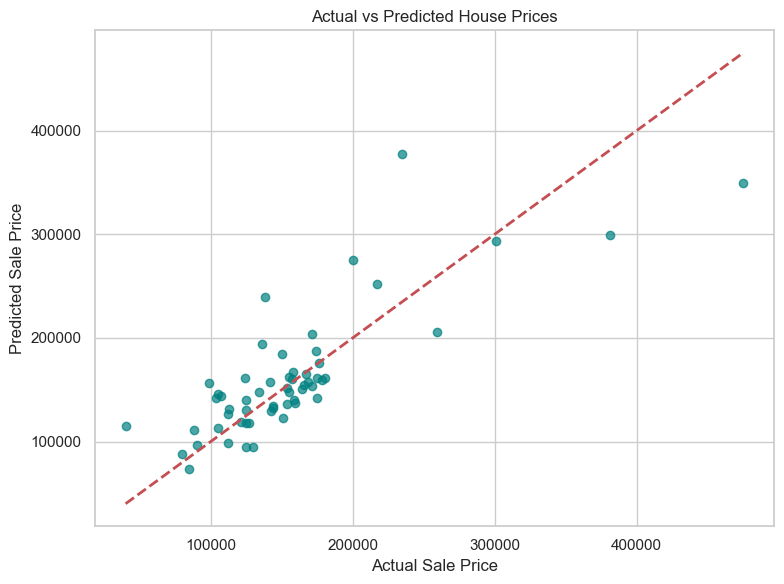

In [31]:
#Predictive Modeling with Extra Features (Basement, Exterior)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load your housing data
df1 =pd.read_csv("housing_data.csv")

# Map categorical features
df1['KitchenQual_num'] = df1['KitchenQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df1['Fence_num'] = df1['Fence'].map({'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})
df1['ExterQual_num'] = df1['ExterQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

# Select features
features = [
    'GrLivArea', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual_num',
    'Fireplaces', 'GarageCars', 'GarageArea', 'PoolArea', 'Fence_num', 'ExterQual_num'
]

# Clean data
df1 = df1[features + ['SalePrice']].dropna()
X = df1[features]
y = df1['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
 Conclusion Summary
Total records: 1,460 houses

Total features: 81 columns

Missing values: Only a few columns with missing values; GarageYrBlt (81 missing), and Electrical (1 missing)

💵 Sale Price Statistics
Average Price: ₹180,921

Price Range: ₹34,900 to ₹755,000

50% of homes fall between ₹129,975 and ₹214,000

Indicates a moderately priced housing market with a few high-end outliers

🧩 Influence of Key Features on Price
Kitchen Quality  (KitchenQual)
Quality	Avg Price   (₹)
Excellent (Ex)	   328,555
Good (Gd)	       212,116
Typical (TA)	   139,963
Fair (Fa)	       105,565

✅ Kitchen quality shows a strong influence on pricing — upgrading this can significantly raise value.

Exterior Quality  (ExterQual)
Quality	Avg Price      (₹)
Excellent (Ex)	      367,361
Good (Gd)	          231,634
Typical (TA)	      144,341
Fair (Fa)	          87,985

✅ Exterior appeal plays a major role in pricing — better exteriors attract higher valuations.

🔥 Number of Fireplaces
Fireplaces	Avg Price (₹)
 0	          141331
 1	          211844
 2	          240589
 3	          252000

✅ Fireplaces are a luxury signal — more fireplaces, higher average price.

